In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load train and test data

In [11]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression
from cost import compute_loss


### Load train and test data

In [12]:
# Data paths
DATA_TRAIN_PATH = "../data/train.csv"

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [13]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [14]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-4,-2,7)
k_fold = 4
seed = 2
degrees, lambdas

(range(1, 20),
 array([0.0001    , 0.00021544, 0.00046416, 0.001     , 0.00215443,
        0.00464159, 0.01      ]))

## Group 2

In [15]:
# get train and test data
train_index = jet_train_samples[2]
x, y = X[train_index], Y[train_index]

### Best degree

In [8]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean, x_val_clean = clean_data(x_train, x_val)
            
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

1 73.35263303005239 73.25889164598843
2 76.94145758661888 76.84587813620071
3 79.19814355298226 79.06534325889163
4 80.25043654075913 80.12131237937689
5 80.44986674018932 80.28535980148882
6 80.63643047514014 80.44527157430383
7 81.5324878228104 81.36614281775573
8 82.52044848819042 82.33526330300523
9 82.87060012866465 82.70747173972981
10 82.92620163587907 82.69644334160463
11 83.01856447017737 82.78329197684036
12 83.2042091719511 82.97628894403088
13 81.67815458138038 81.47642679900744
14 82.2870140612076 82.06920319823546
15 82.0921790276629 81.91480562448304
16 76.80498115981987 76.49434794596085
17 71.78430291333517 71.76040805073063
18 66.12857274147596 66.119382409705
19 69.29418251998896 69.08050730631376


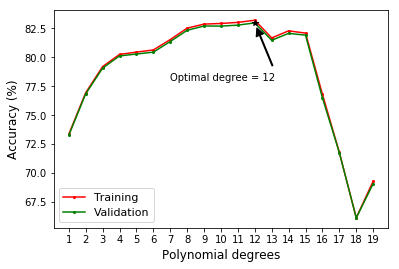

In [9]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-5, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group2.eps")
plt.show()

### Best lambda

In [ ]:
acc_training = []
acc_validation = []
best_degree = 12

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,x_val_clean = clean_data(x_train, x_val)
            
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

0.0001 82.61005422295744 82.37799834574028
0.00021544346900318845 83.1270103850749 82.91287565481113
0.00046415888336127773 83.19777593971143 83.00248138957815
0.001 83.2042091719511 82.97628894403088


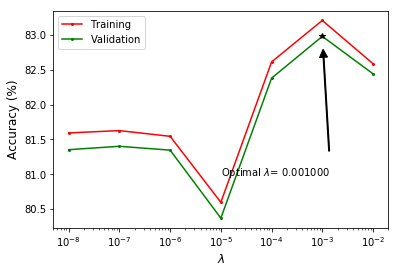

In [11]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-2),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group2.eps")
plt.show()